In [1]:
import numpy as np
import matplotlib.pyplot
import xmitgcm
import xarray as xr

In [2]:
run_dir = "/scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/"

In [3]:
ds = xmitgcm.open_mdsdataset(
    run_dir,
    prefix = 'dynDiag',
    ref_date = '2025-01-01',
    delta_t = 1200,
)

/home/tshahriar/tools_and_software/miniforge3/envs/py38/lib/python3.8/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/ or /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "
/home/tshahriar/tools_and_software/miniforge3/envs/py38/lib/python3.8/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/ or /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "
/home/tshahriar/tools_and_software/miniforge3/envs/py38/lib/python3.8/site-packages/xmitgcm/mds_store.py:913: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/ or /scratch2/tshahriar/pV3imAdj_withAdjFreqs_run_5879/. Using default 

In [4]:
ds.data_vars

Data variables:
    THETA    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    PHIHYD   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    UVEL     (time, Z, YC, XG) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    THETASQ  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    UVELSQ   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    VVELSQ   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    WVELSQ   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    PhiVEL   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 31, 62, 62), meta=np.ndarray>
    PsiVEL   (time, Z, YG, XG) float32 das

In [5]:
ds.THETA

<xarray.DataArray 'THETA' (time: 72, Z: 31, YC: 62, XC: 62)>
dask.array<concatenate, shape=(72, 31, 62, 62), dtype=float32, chunksize=(1, 31, 62, 62), chunktype=numpy.ndarray>
Coordinates: (12/15)
  * XC         (XC) >f4 -0.5 0.5 1.5 2.5 3.5 4.5 ... 56.5 57.5 58.5 59.5 60.5
  * YC         (YC) >f4 14.5 15.5 16.5 17.5 18.5 ... 71.5 72.5 73.5 74.5 75.5
  * Z          (Z) >f4 -5.0 -15.66 -27.75 ... -2.549e+03 -2.897e+03 -3.291e+03
    rA         (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    Depth      (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    drF        (Z) >f4 dask.array<chunksize=(31,), meta=np.ndarray>
    ...         ...
    rhoRef     (Z) >f4 dask.array<chunksize=(31,), meta=np.ndarray>
    maskCtrlC  (Z, YC, XC) bool dask.array<chunksize=(31, 62, 62), meta=np.ndarray>
    dxF        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyF        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2025-01-06 2025-01-11 ... 2025-12-27
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

In [6]:
ds.THETA.time # here the diagnostic are spit out at every five days. 72*5 = 360 days = 1 year

<xarray.DataArray 'time' (time: 72)>
array(['2025-01-06T00:00:00.000000000', '2025-01-11T00:00:00.000000000',
       '2025-01-16T00:00:00.000000000', '2025-01-21T00:00:00.000000000',
       '2025-01-26T00:00:00.000000000', '2025-01-31T00:00:00.000000000',
       '2025-02-05T00:00:00.000000000', '2025-02-10T00:00:00.000000000',
       '2025-02-15T00:00:00.000000000', '2025-02-20T00:00:00.000000000',
       '2025-02-25T00:00:00.000000000', '2025-03-02T00:00:00.000000000',
       '2025-03-07T00:00:00.000000000', '2025-03-12T00:00:00.000000000',
       '2025-03-17T00:00:00.000000000', '2025-03-22T00:00:00.000000000',
       '2025-03-27T00:00:00.000000000', '2025-04-01T00:00:00.000000000',
       '2025-04-06T00:00:00.000000000', '2025-04-11T00:00:00.000000000',
       '2025-04-16T00:00:00.000000000', '2025-04-21T00:00:00.000000000',
       '2025-04-26T00:00:00.000000000', '2025-05-01T00:00:00.000000000',
       '2025-05-06T00:00:00.000000000', '2025-05-11T00:00:00.000000000',
       '2025-05-16T00:00:00.000000000', '2025-05-21T00:00:00.000000000',
       '2025-05-26T00:00:00.000000000', '2025-05-31T00:00:00.000000000',
       '2025-06-05T00:00:00.000000000', '2025-06-10T00:00:00.000000000',
       '2025-06-15T00:00:00.000000000', '2025-06-20T00:00:00.000000000',
       '2025-06-25T00:00:00.000000000', '2025-06-30T00:00:00.000000000',
       '2025-07-05T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
       '2025-07-15T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
       '2025-07-25T00:00:00.000000000', '2025-07-30T00:00:00.000000000',
       '2025-08-04T00:00:00.000000000', '2025-08-09T00:00:00.000000000',
       '2025-08-14T00:00:00.000000000', '2025-08-19T00:00:00.000000000',
       '2025-08-24T00:00:00.000000000', '2025-08-29T00:00:00.000000000',
       '2025-09-03T00:00:00.000000000', '2025-09-08T00:00:00.000000000',
       '2025-09-13T00:00:00.000000000', '2025-09-18T00:00:00.000000000',
       '2025-09-23T00:00:00.000000000', '2025-09-28T00:00:00.000000000',
       '2025-10-03T00:00:00.000000000', '2025-10-08T00:00:00.000000000',
       '2025-10-13T00:00:00.000000000', '2025-10-18T00:00:00.000000000',
       '2025-10-23T00:00:00.000000000', '2025-10-28T00:00:00.000000000',
       '2025-11-02T00:00:00.000000000', '2025-11-07T00:00:00.000000000',
       '2025-11-12T00:00:00.000000000', '2025-11-17T00:00:00.000000000',
       '2025-11-22T00:00:00.000000000', '2025-11-27T00:00:00.000000000',
       '2025-12-02T00:00:00.000000000', '2025-12-07T00:00:00.000000000',
       '2025-12-12T00:00:00.000000000', '2025-12-17T00:00:00.000000000',
       '2025-12-22T00:00:00.000000000', '2025-12-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2025-01-06 2025-01-11 ... 2025-12-27
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

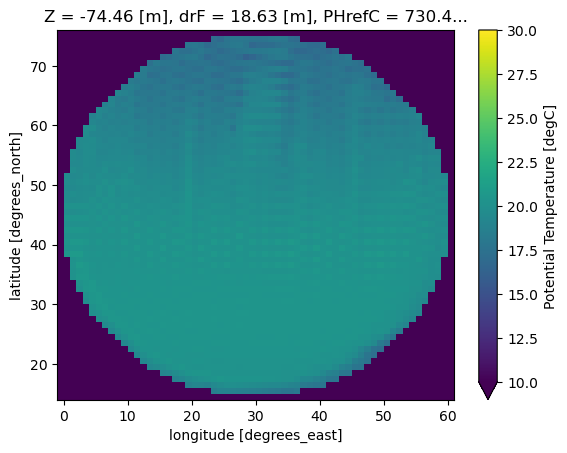

In [7]:
ds.THETA.isel(time=14, Z=5).plot(vmin=10, vmax=30) #this is 70 days (14*5) into the run

This is suspicious numericl artifacts. Have to work on the forward model.

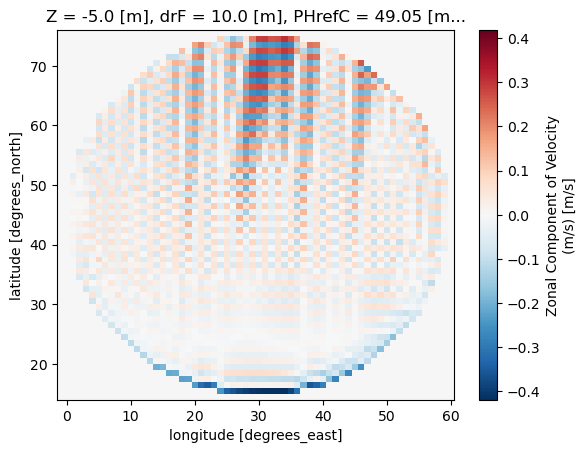

In [8]:
ds.UVEL.isel(time=10, Z=0).plot()

In [9]:
ds.time

<xarray.DataArray 'time' (time: 72)>
array(['2025-01-06T00:00:00.000000000', '2025-01-11T00:00:00.000000000',
       '2025-01-16T00:00:00.000000000', '2025-01-21T00:00:00.000000000',
       '2025-01-26T00:00:00.000000000', '2025-01-31T00:00:00.000000000',
       '2025-02-05T00:00:00.000000000', '2025-02-10T00:00:00.000000000',
       '2025-02-15T00:00:00.000000000', '2025-02-20T00:00:00.000000000',
       '2025-02-25T00:00:00.000000000', '2025-03-02T00:00:00.000000000',
       '2025-03-07T00:00:00.000000000', '2025-03-12T00:00:00.000000000',
       '2025-03-17T00:00:00.000000000', '2025-03-22T00:00:00.000000000',
       '2025-03-27T00:00:00.000000000', '2025-04-01T00:00:00.000000000',
       '2025-04-06T00:00:00.000000000', '2025-04-11T00:00:00.000000000',
       '2025-04-16T00:00:00.000000000', '2025-04-21T00:00:00.000000000',
       '2025-04-26T00:00:00.000000000', '2025-05-01T00:00:00.000000000',
       '2025-05-06T00:00:00.000000000', '2025-05-11T00:00:00.000000000',
       '2025-05-16T00:00:00.000000000', '2025-05-21T00:00:00.000000000',
       '2025-05-26T00:00:00.000000000', '2025-05-31T00:00:00.000000000',
       '2025-06-05T00:00:00.000000000', '2025-06-10T00:00:00.000000000',
       '2025-06-15T00:00:00.000000000', '2025-06-20T00:00:00.000000000',
       '2025-06-25T00:00:00.000000000', '2025-06-30T00:00:00.000000000',
       '2025-07-05T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
       '2025-07-15T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
       '2025-07-25T00:00:00.000000000', '2025-07-30T00:00:00.000000000',
       '2025-08-04T00:00:00.000000000', '2025-08-09T00:00:00.000000000',
       '2025-08-14T00:00:00.000000000', '2025-08-19T00:00:00.000000000',
       '2025-08-24T00:00:00.000000000', '2025-08-29T00:00:00.000000000',
       '2025-09-03T00:00:00.000000000', '2025-09-08T00:00:00.000000000',
       '2025-09-13T00:00:00.000000000', '2025-09-18T00:00:00.000000000',
       '2025-09-23T00:00:00.000000000', '2025-09-28T00:00:00.000000000',
       '2025-10-03T00:00:00.000000000', '2025-10-08T00:00:00.000000000',
       '2025-10-13T00:00:00.000000000', '2025-10-18T00:00:00.000000000',
       '2025-10-23T00:00:00.000000000', '2025-10-28T00:00:00.000000000',
       '2025-11-02T00:00:00.000000000', '2025-11-07T00:00:00.000000000',
       '2025-11-12T00:00:00.000000000', '2025-11-17T00:00:00.000000000',
       '2025-11-22T00:00:00.000000000', '2025-11-27T00:00:00.000000000',
       '2025-12-02T00:00:00.000000000', '2025-12-07T00:00:00.000000000',
       '2025-12-12T00:00:00.000000000', '2025-12-17T00:00:00.000000000',
       '2025-12-22T00:00:00.000000000', '2025-12-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2025-01-06 2025-01-11 ... 2025-12-27
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

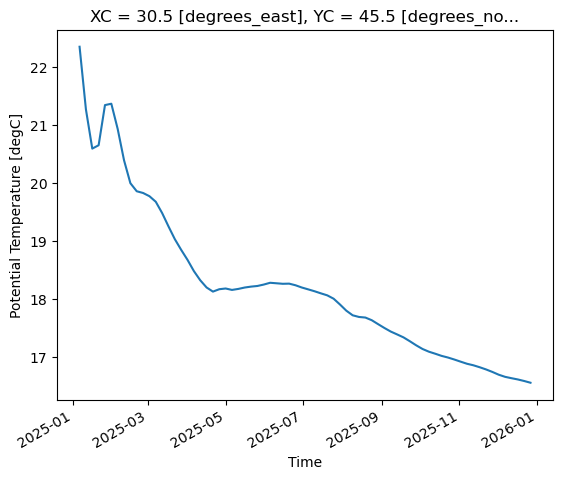

In [10]:
ds.THETA.isel(Z=0, YC=31, XC=31).plot()

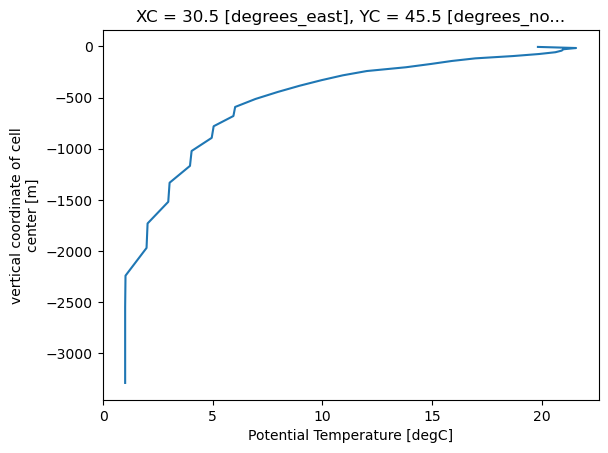

In [17]:
ds.THETA.isel(time=10, YC=31, XC=31).plot(y='Z')

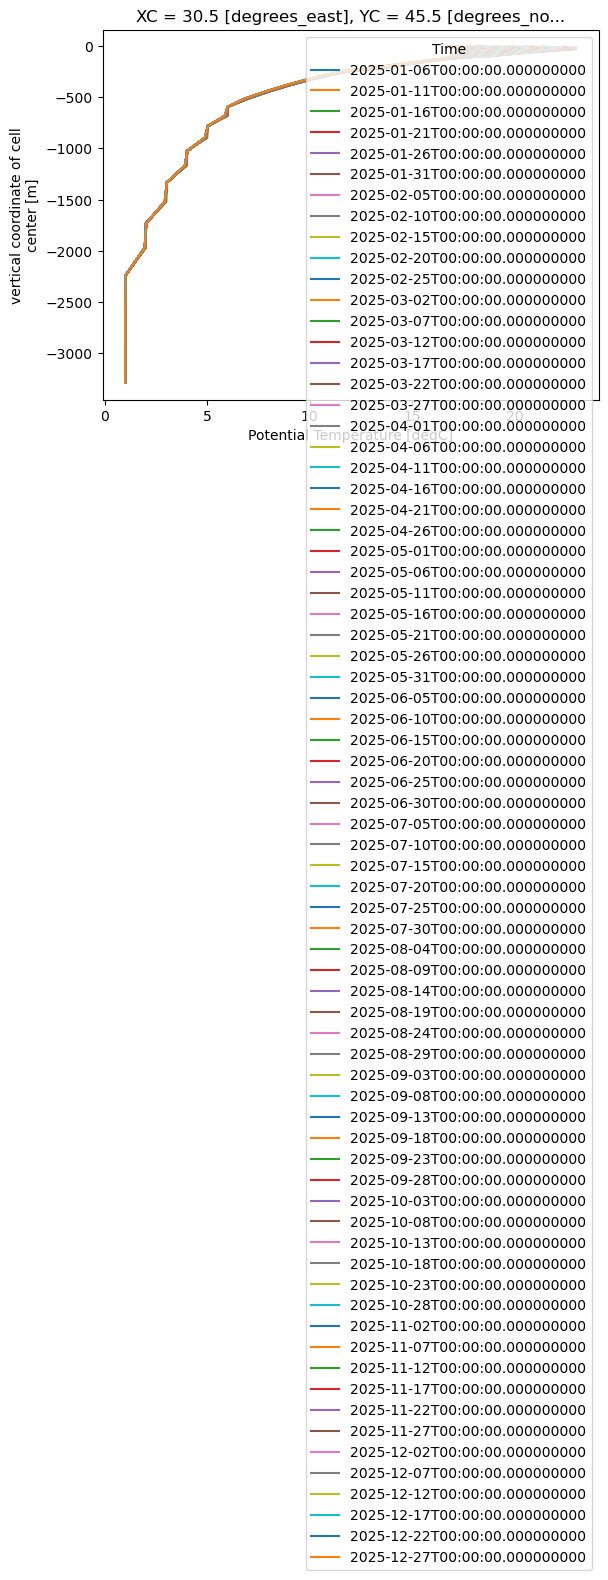

In [18]:
ds.THETA.isel(YC=31, XC=31).plot(y='Z', hue='time')

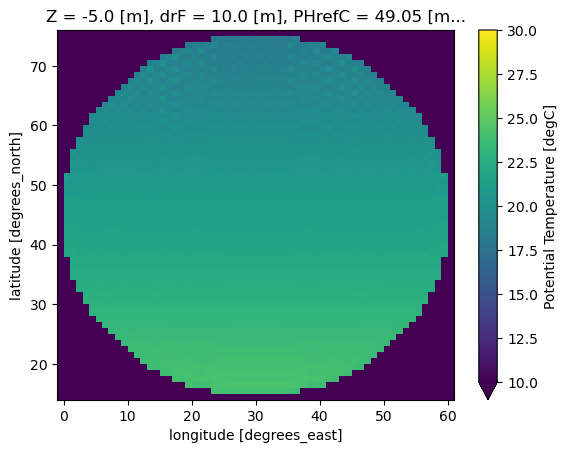

In [21]:
ds.THETA.isel(time=1, Z=0).plot(vmin=10, vmax=30)